In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.path.abspath('.'))

C:\Users\user


In [ ]:
#根据城市人口数量，预测开小吃店的利润 数据在ex1data1.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。

In [14]:
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])#指定标题行
data.head()  #head函数可以默认读取前5行的数据

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [15]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


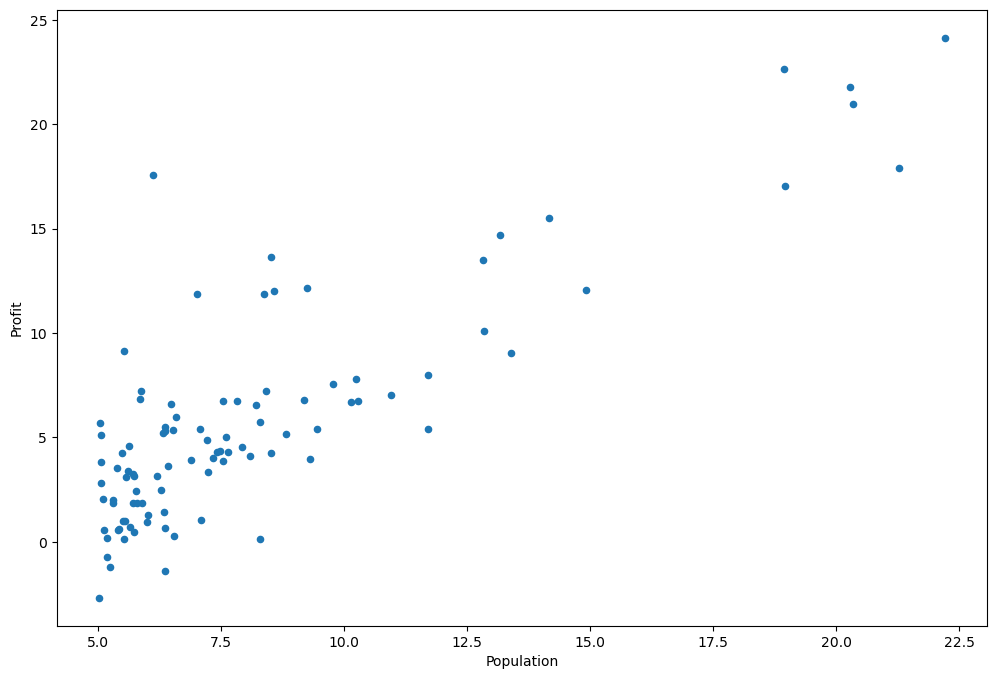

In [16]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))#控制图的大小
plt.show()#绘图

In [19]:
def computeCost(X, y, theta):
    # your code here  (appro ~ 2 lines)
    inner = np.power(((X*theta.T)-y),2)#每一个元素都平方
    return np.sum(inner)/(2*len(X))
#让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。在训练集的左侧插入一列全为“1”的列，以便计算即x0=1

In [20]:
data.insert(0, 'Ones', 1)
#现在我们来做一些变量初始化。.shape[0] 为第一维的长度,shape[1] 为第二维的长度理解列.pandas中利用.iloc选取数据iloc',' 前的部分标明选取的行，‘,’后的部分标明选取的列 此时三列了

In [21]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]

In [22]:
X.head()#head()默认是观察前5行

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [23]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [26]:
X = np.matrix(X.values)
y = np.matrix(y.values)
# your code here  (appro ~ 1 lines)
theta = np.matrix(np.array([0,0]))#初始化
#theta 是一个(1,2)矩阵

In [27]:
theta

matrix([[0, 0]])

In [28]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [30]:
computeCost(X, y, theta)#计算代价函数 (theta初始值为0).

32.072733877455676

In [31]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) #构建零值矩阵
    parameters = int(theta.ravel().shape[1])# ravel计算需要求解的参数个数 功能将多维数组降至一维
    cost = np.zeros(iters) #构建iters个0的数组
    
    for i in range(iters):
        # your code here  (appro ~ 1 lines)
        error = (X * theta.T) - y
        for j in range(parameters):
            # your code here  (appro ~ 2 lines)
            term = np.multiply(error, X[:,j])#计算两矩阵(hθ(x)-y)x
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        # your code here  (appro ~ 2 lines)    
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [32]:
alpha = 0.01
iters = 1000

In [33]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [34]:
computeCost(X, y, g)#最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

4.515955503078914

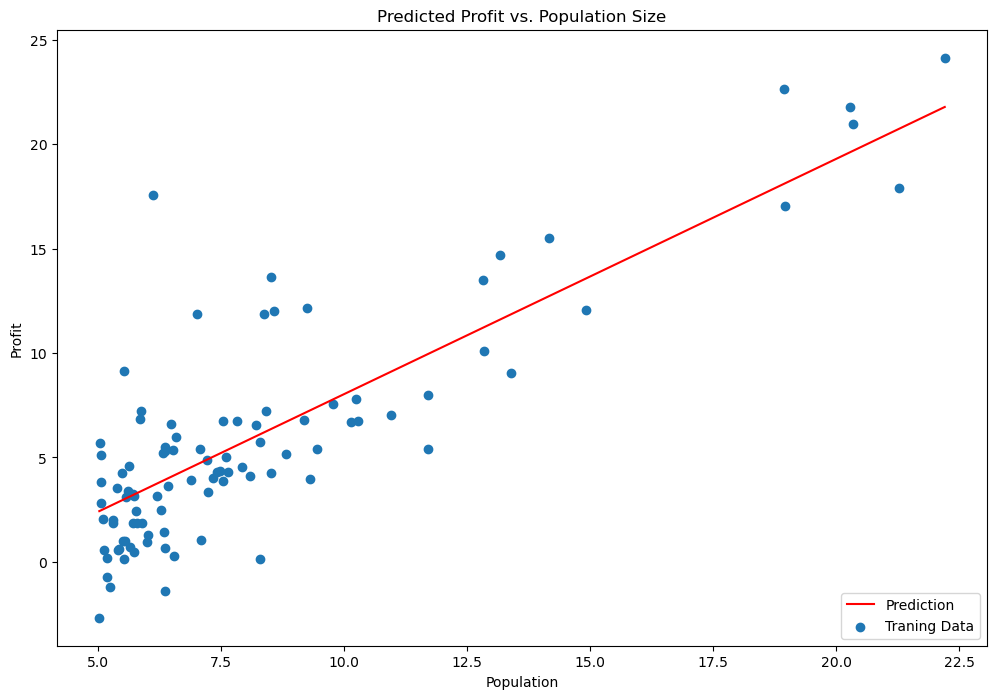

In [35]:
#现在我们来绘制线性模型以及数据，直观地看出它的拟合。fig代表整个图像，ax代表实例
x = np.linspace(data.Population.min(), data.Population.max(), 100)#抽100个样本
f = g[0, 0] + (g[0, 1] * x)#g[0,0] 代表theta0 , g[0,1] 代表theta1


fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=4)#显示标签位置
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

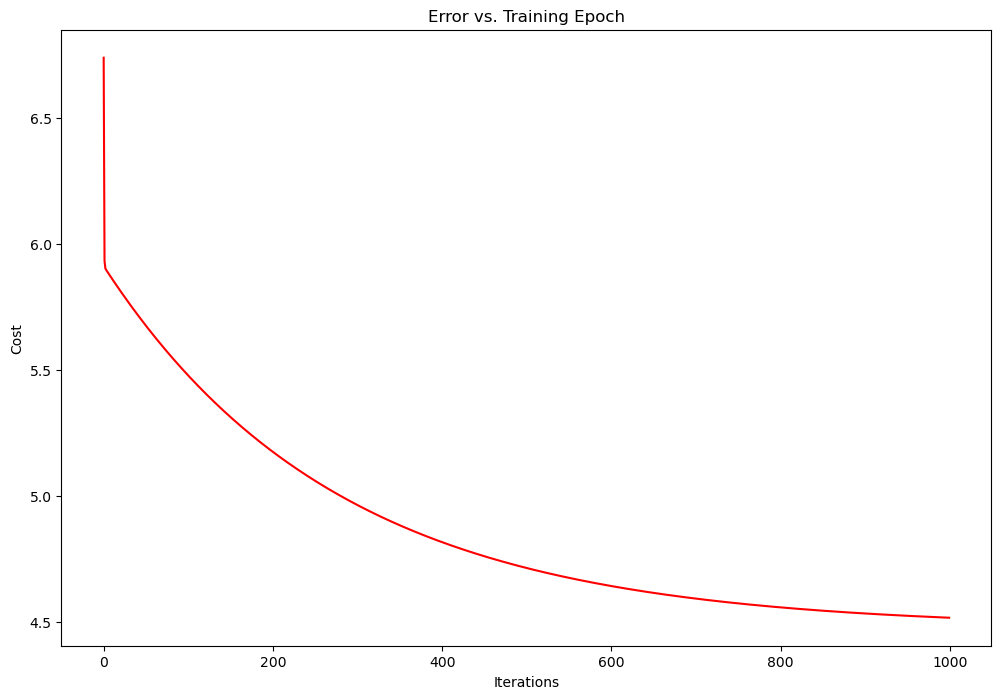

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [37]:
#多变量线性回归
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [38]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [39]:
#现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

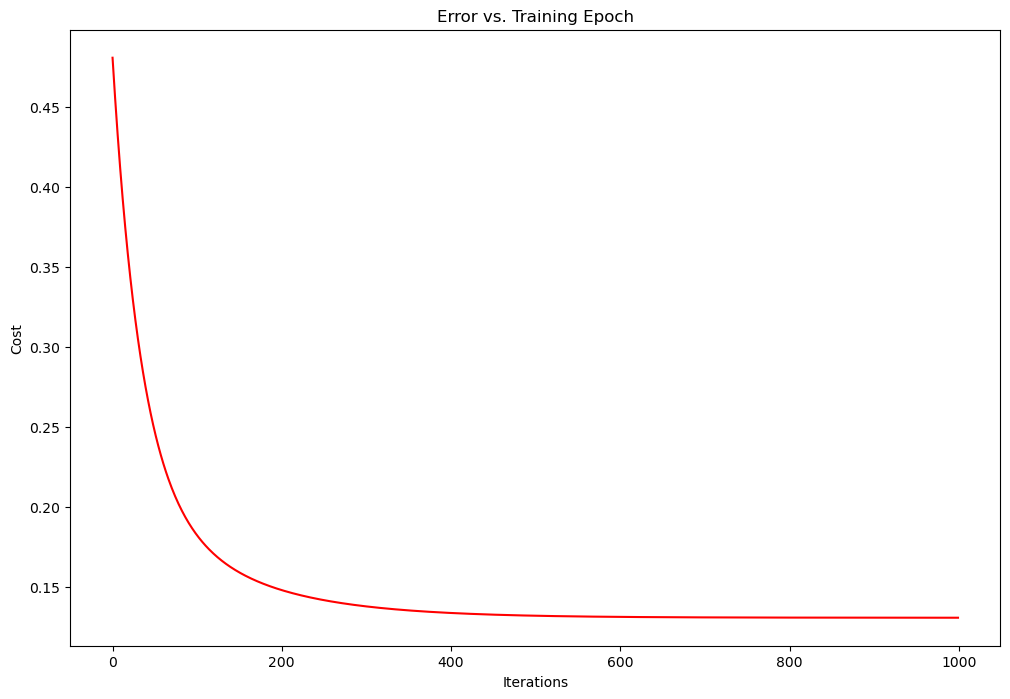

In [40]:
#我们也可以快速查看这一个的训练进程。
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [41]:
# 正规方程
def normalEqn(X, y):
    # your code here  (appro ~ 1 lines)
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [42]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

matrix([[-3.89578088],
        [ 1.19303364]])